# Test SST Indices Calculations

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import utils.sstIndex as sst
import utils._indexDefinitions as _index

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime

First load up the cvdp and figure out the details of the index we want to calculate

In [3]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '005')

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']


Do a sanity check of what the areas are to calculate the indeces

In [4]:
#get a list of index names to iterate, and then add indian ocean dipole, as a special case
indexNames = list(_index.sstIndex.keys())
indexNames.append('indian_ocean_dipole')


for keys in indexNames:
    try:
        print(keys, ": ", cvdp[keys].comment_cvdp)
    except:
        print (keys, " not defined in Cvdp")



nino12 :  area average domain (-10:0N, 270:280E)
nino3 :  area average domain (-5:5N, 210:270E)
nino34 :  area average domain (-5:5N, 190:240E)
nino4 :  area average domain (-5:5N, 160:210E)
westIO  not defined in Cvdp
eastIO  not defined in Cvdp
indian_ocean_dipole :  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)


In [5]:
cvdp.time

<xarray.DataArray 'time' (time: 13872)>
array([cftime.DatetimeNoLeap(850, 1, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(850, 2, 28, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(850, 3, 31, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2005, 10, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 11, 30, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00

Next load the model outputs, but drop all the variables we don't care about

In [6]:
ds = fh.loadModelData('CESM-LME', 'SST', '005',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.085001-089912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.090001-099912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.100001-109912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.110001-119912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.120001-129912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.130001-139912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.140001-149912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.150001-159912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.160001-169912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.170001-179912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.180001-184

In [7]:
ds.time

<xarray.DataArray 'time' (time: 13872)>
array([cftime.DatetimeNoLeap(850, 1, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(850, 2, 28, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(850, 3, 31, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2005, 10, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 11, 30, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00

In [8]:
%time


indexDs = sst.calculateIndex(ds, 850, 2005) #based on 850 to 2005 climatology per CVDP

Wall time: 0 ns


C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence

Do a comparison plot. Between calculated indexes and cvdp

Wall time: 0 ns


C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


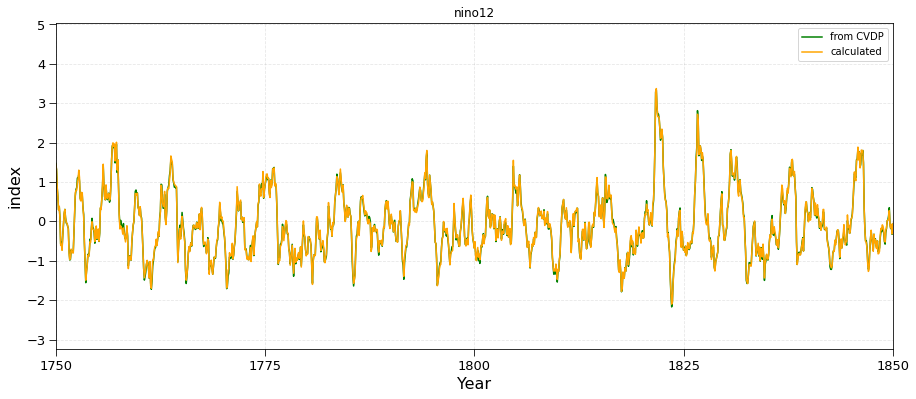

nino12  standard devition of difference:  0.04845021699883295


C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


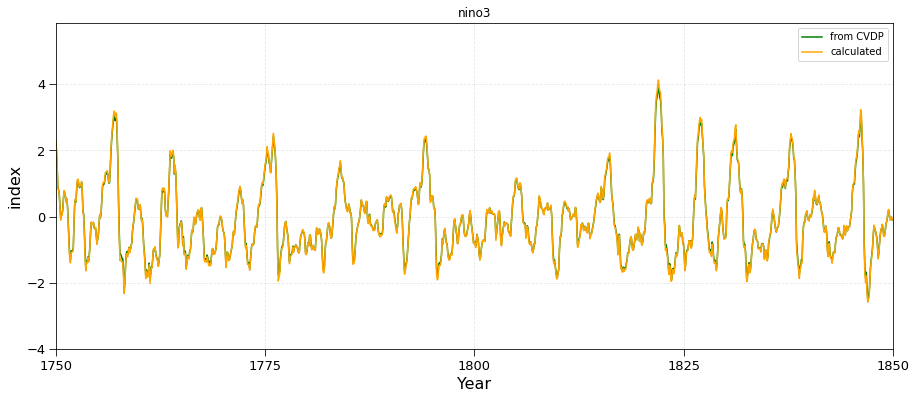

nino3  standard devition of difference:  0.05986970605687629


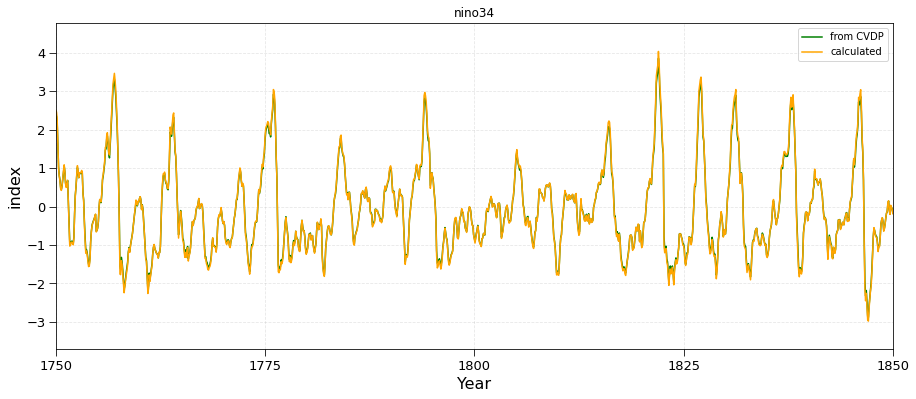

nino34  standard devition of difference:  0.054072379367523585


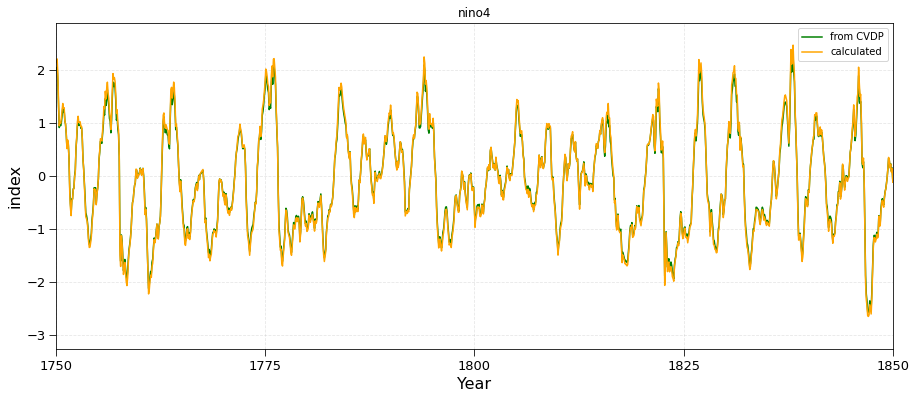

nino4  standard devition of difference:  0.06244162808981649
westIO  not defined in Cvdp
eastIO  not defined in Cvdp


C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


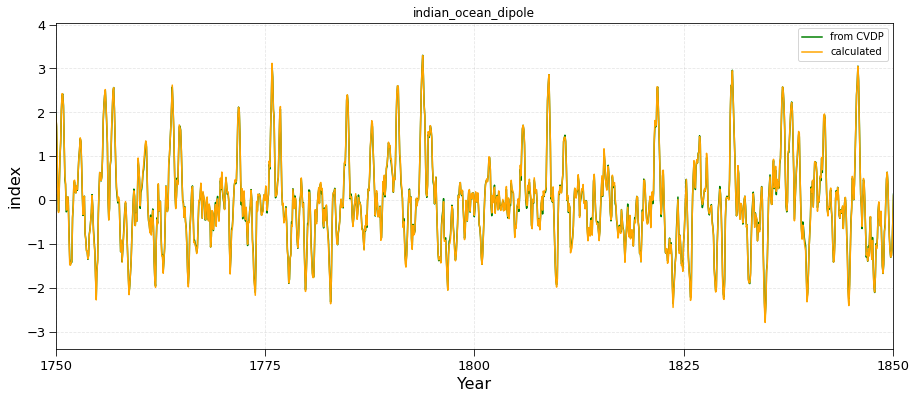

indian_ocean_dipole  standard devition of difference:  0.043625235434633786


In [9]:
%time



for keys in indexNames:
    
    try:
        #test if this is an index in cvdp
        cvdp[keys]

    except:
        print (keys, " not defined in Cvdp")        
        
    else:
        
        #load into memory so its doesn't get loaded twice if we want to use it later
        indexDs[keys].load()
        
        # set-up plot
        fig = plt.figure(figsize=(15,6))
        ax = fig.add_subplot(1, 1, 1)
        
        #plot the cvdp
        cvdp[keys].plot(color='green' ,label='from CVDP')
                
        #plot the calculated one
        indexDs[keys].plot(color='orange',label='calculated')
        
        #set the horizontal axis to something nice
        plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(1850,1,1))

        #add axis names and title
        plt.title(keys)
        plt.ylabel("index", fontsize=16)  
        plt.xlabel("Year", fontsize=16)

        #make it neat
        plt.tick_params(which = 'minor', labelsize=13, length=4)
        plt.tick_params(which = 'major', labelsize=13, length=7)
        ax.grid(which='major', alpha=0.3, linestyle='dashed')

        #show the legend based on the 'labels' set above
        plt.legend()

        #make it so
        plt.show()

        print(keys, " standard devition of difference: ", (indexDs[keys]-cvdp[keys]).std().values)


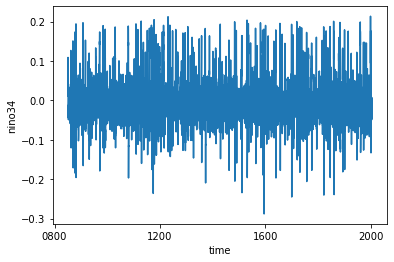

In [10]:
(indexDs.nino34-cvdp.nino34).plot()

In [11]:
indexDs.to_netcdf("results/monthlySstIndicesCalculated.nc")

C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [12]:
indexDs

<xarray.Dataset>
Dimensions:              (time: 13872)
Coordinates:
  * time                 (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:...
    month                (time) int64 1 2 3 4 5 6 7 8 9 ... 4 5 6 7 8 9 10 11 12
Data variables:
    nino12               (time) float64 -0.1467 -0.2084 ... 0.08253 -0.07373
    nino3                (time) float64 -0.225 0.04833 ... -0.3555 -0.2344
    nino34               (time) float64 -0.2615 -0.02548 ... -0.6838 -0.4795
    nino4                (time) float64 -0.1944 -0.03504 ... -0.5382 -0.5175
    westIO               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    eastIO               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    indian_ocean_dipole  (time) float64 0.05452 0.6666 ... -0.5557 -0.08588